In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data : 
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# Cheking for missing values : 
missing_values = data.isnull().sum()
missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
data = data.drop_duplicates()

In [5]:
data['default'] = data['default'].apply(lambda x: 1 if x == 'yes' else 0)
data['housing'] = data['housing'].apply(lambda x: 1 if x == 'yes' else 0)
data['loan'] = data['loan'].apply(lambda x: 1 if x == 'yes' else 0)
data['deposit'] = data['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [6]:
# Select the columns :
categorical = ["job", "marital", "education", "contact","month","poutcome"]

for features in categorical :
    data[features] = data[features].astype('category').cat.codes

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


____

# Classification with SVM : 

In [8]:
# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
# Preprocess the Data
X = data.drop('deposit', axis=1)  # Features
y = data['deposit']  # Target variable

# Optional: Scaling the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Train the SVM Model
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
# Evaluate the Model
y_pred = svm_model.predict(X_test)

### Evaluate the model :

#### Accuracy :

In [13]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 79.09%


#### Confusion matrix :

In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[942, 224],
       [243, 824]], dtype=int64)

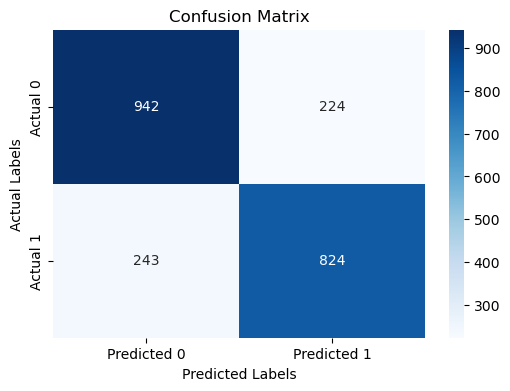

In [15]:
# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

# Save the confusion matrix as a PNG file
plt.savefig('confusion_matrix.png', format='png')

# Optionally, display the plot
plt.show()